In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import stats
import statsmodels.api as sm


In [2]:
df = pd.read_csv("Life_Expectancy.csv")
df.head()

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
0,Afghanistan,Developing,263,62,65,1154,19.1,83,6,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1,65.0
1,Albania,Developing,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,77.5
2,Algeria,Developing,19,21,95,63,59.5,24,95,95,0.1,4132.762920,39871528,6.0,5.8,0.743,14.4,75.6
3,Angola,Developing,335,66,64,118,23.3,98,7,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4,52.4
4,Argentina,Developing,116,8,94,0,62.8,9,93,94,0.1,13467.123600,43417765,1.0,0.9,0.826,17.3,76.3


### Null value treatment

In [3]:
df.isnull().sum()

Country               0
Status                0
Adult_Mortality       0
Infant_Deaths         0
Hepatitis             0
Measles               0
 BMI                  0
Underfive_Deaths      0
Polio                 0
Diphtheria            0
 HIV                  0
GDP                   0
Population            0
Malnourished10_19     0
Malnourished5_9       0
Income_Index          0
Schooling             0
Expected              0
dtype: int64

### Duplicates

In [4]:
df[df.duplicated()]

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected


### Outlier Treatment

<Axes: >

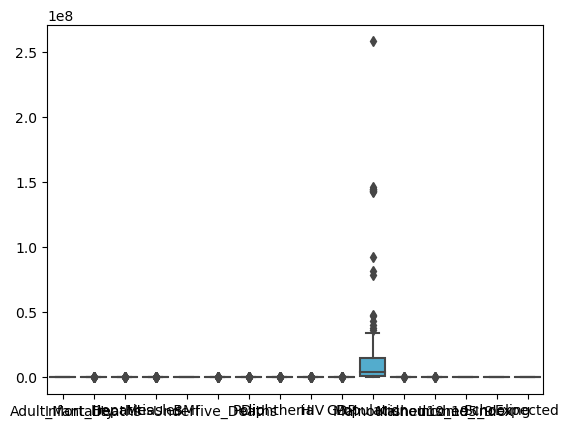

In [5]:
sns.boxplot(df)

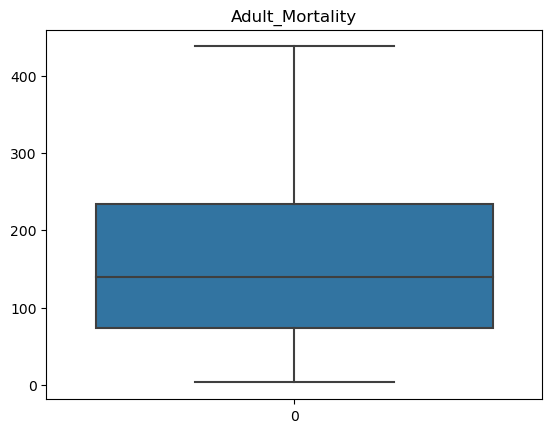

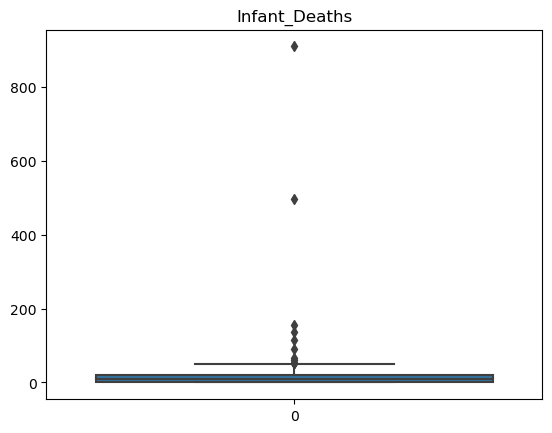

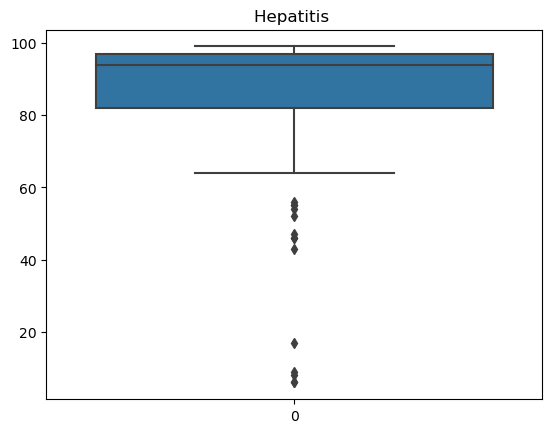

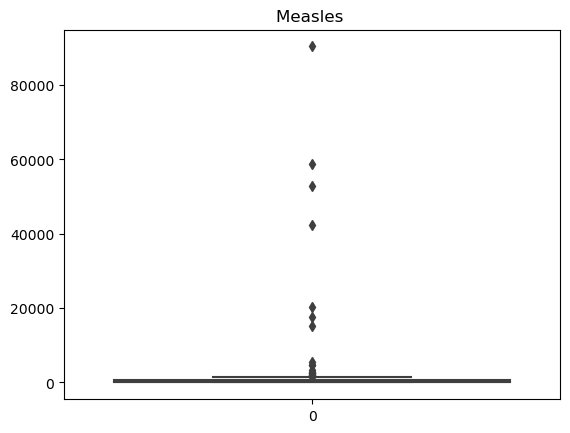

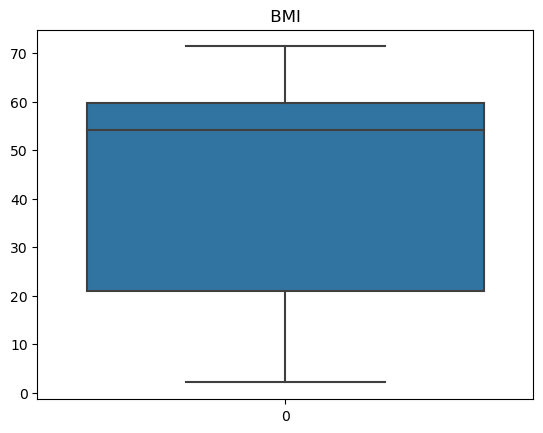

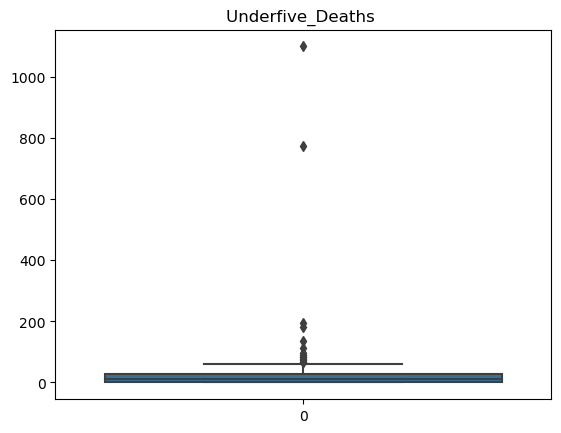

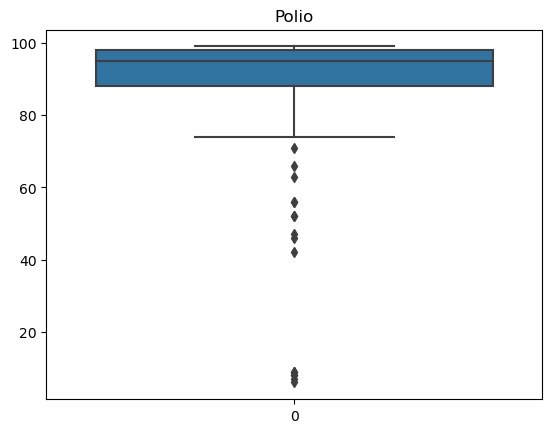

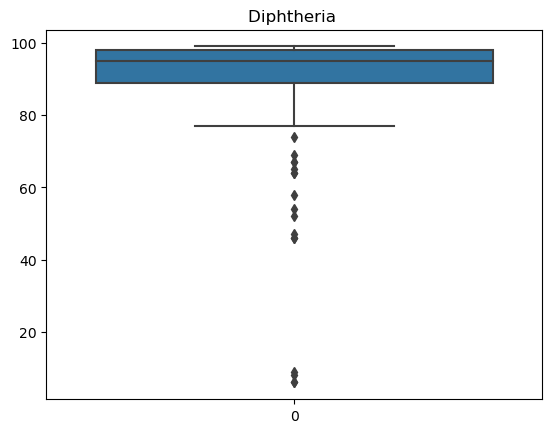

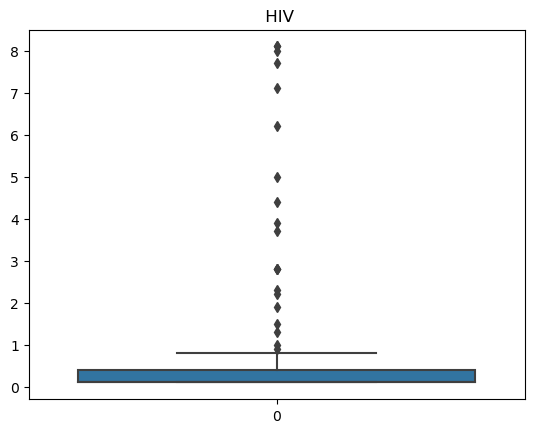

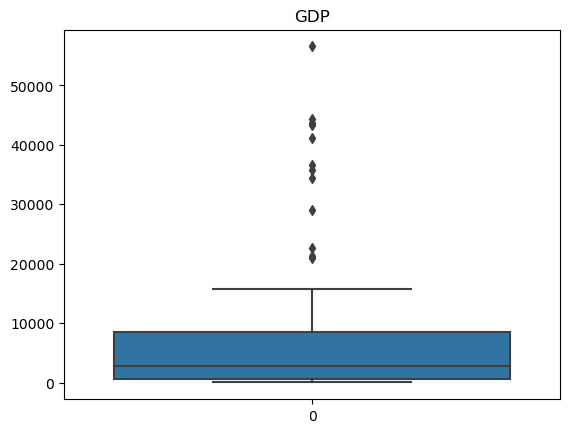

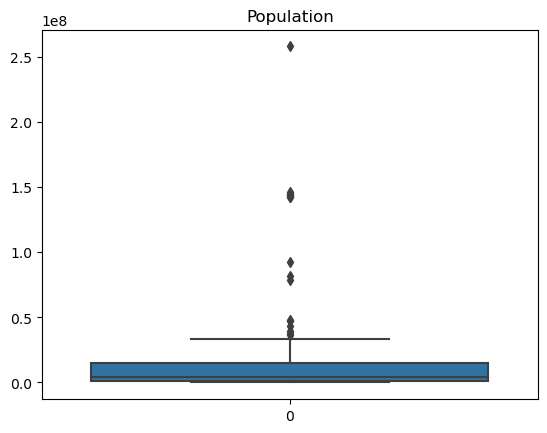

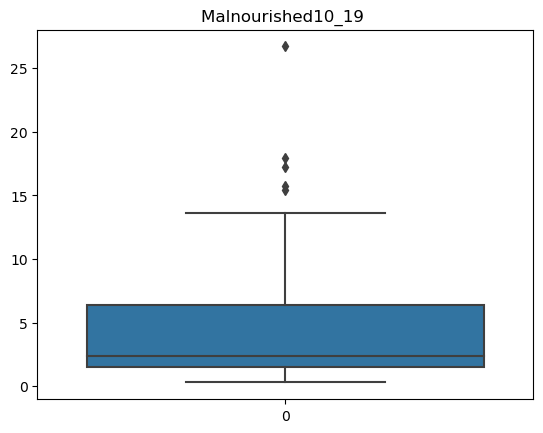

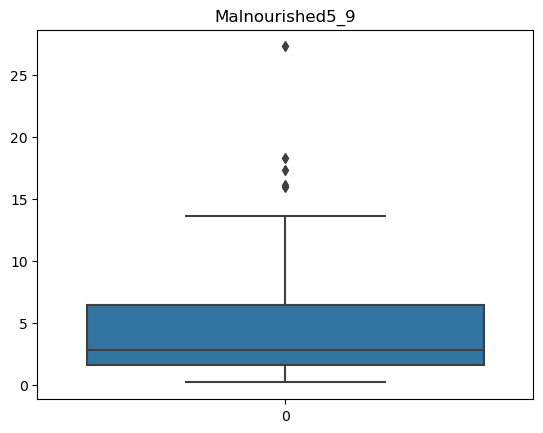

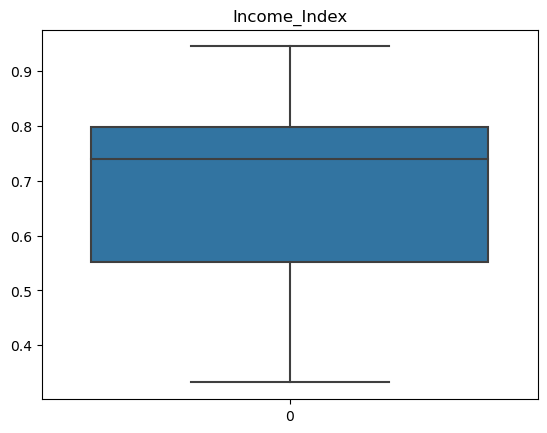

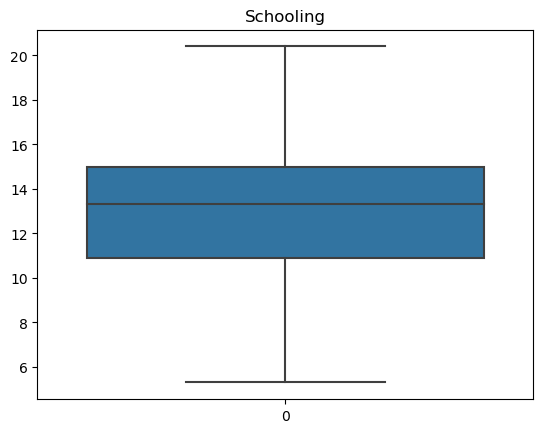

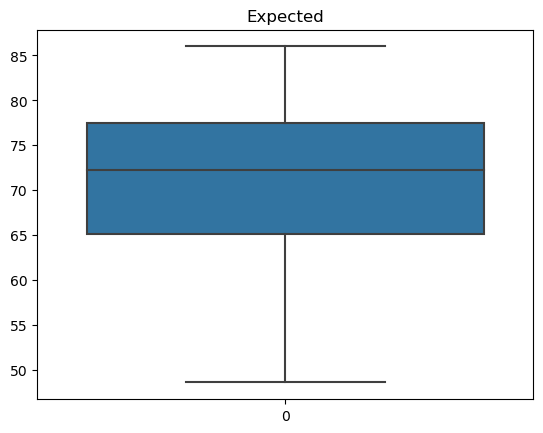

In [6]:
for i in df.select_dtypes(exclude=object).columns:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

In [7]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3- q1
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr
df_new =df[~((df<ll)|(df>ul)).any(axis=1)]


C:\Users\BusinessComputersin\AppData\Local\Temp\ipykernel_17552\1484721968.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = df.quantile(0.25)
C:\Users\BusinessComputersin\AppData\Local\Temp\ipykernel_17552\1484721968.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = df.quantile(0.75)
C:\Users\BusinessComputersin\AppData\Local\Temp\ipykernel_17552\1484721968.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_new =df[~((df<ll)|(df>ul)).any(axis=1)]


In [8]:
df_new.shape

(53, 18)

In [9]:
df.shape

(124, 18)

<Axes: >

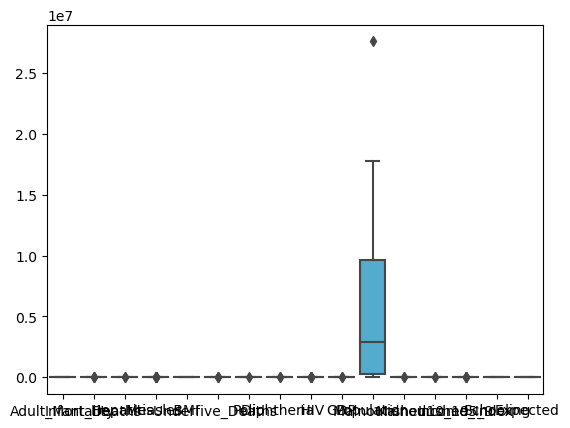

In [10]:
sns.boxplot(df_new)

In [11]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 1 to 112
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             53 non-null     object 
 1   Status              53 non-null     object 
 2   Adult_Mortality     53 non-null     int64  
 3   Infant_Deaths       53 non-null     int64  
 4   Hepatitis           53 non-null     int64  
 5   Measles             53 non-null     int64  
 6    BMI                53 non-null     float64
 7   Underfive_Deaths    53 non-null     int64  
 8   Polio               53 non-null     int64  
 9   Diphtheria          53 non-null     int64  
 10   HIV                53 non-null     float64
 11  GDP                 53 non-null     float64
 12  Population          53 non-null     int64  
 13  Malnourished10_19   53 non-null     float64
 14  Malnourished5_9     53 non-null     float64
 15  Income_Index        53 non-null     float64
 16  Schooling

### Encoding

In [12]:
df_new['Status'].value_counts()

Developing    42
Developed     11
Name: Status, dtype: int64

In [13]:
df_new['Status']=df_new['Status'].map({'Developing':1, 'Developed':2})

C:\Users\BusinessComputersin\AppData\Local\Temp\ipykernel_17552\2743329969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Status']=df_new['Status'].map({'Developing':1, 'Developed':2})


In [14]:
df_new

,Country,Status,Adult_Mortality,Infant_Deaths,Hepatitis,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Expected
1,Albania,1,8,0,98,0,57.2,1,98,98,0.1,4575.763787,288914,1.2,1.3,0.761,14.2,77.5
5,Armenia,1,118,1,94,33,54.9,1,96,94,0.1,369.654776,291695,2.1,2.2,0.741,12.7,74.8
8,Azerbaijan,1,118,5,96,0,52.5,6,98,96,0.1,55.313820,9649341,2.8,2.9,0.758,12.7,72.7
11,Barbados,1,98,0,97,0,54.5,0,97,97,0.1,15557.838100,276633,3.8,3.7,0.794,15.3,75.5
12,Belarus,1,196,0,99,2,62.3,0,99,99,0.1,5949.116770,9489616,1.9,2.0,0.798,15.6,72.3
13,Belgium,2,74,0,98,47,63.7,1,99,99,0.1,4356.875000,11274196,1.0,1.0,0.895,16.6,81.1
14,Belize,1,175,0,94,0,5.9,0,94,94,0.2,4849.997495,359288,3.5,3.4,0.706,12.8,71.0
19,Brazil,1,142,42,96,214,56.1,47,98,96,0.1,8757.262200,2596218,2.7,2.6,0.754,15.2,75.0
20,Brunei Darussalam,1,78,0,99,4,41.2,0,99,99,0.1,3967.895100,418002,5.7,5.1,0.864,14.9,77.7
21,Bulgaria,2,137,0,92,0,65.7,1,91,91,0.1,6993.477360,7177991,1.9,1.8,0.792,15.0,74.5


In [15]:
df_new.shape

(53, 18)

In [16]:
df_new.drop(['Country'],axis=1,inplace=True)

C:\Users\BusinessComputersin\AppData\Local\Temp\ipykernel_17552\591117360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.drop(['Country'],axis=1,inplace=True)


### Train test split

In [17]:
from sklearn.model_selection import train_test_split
X = df_new.drop(["Expected"], axis=1)
y = df_new["Expected"]

In [18]:
Xc = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(Xc,y,test_size=30, random_state=100)

In [19]:
ols_model = sm.OLS(y_train,X_train).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     7.773
Date:                Wed, 29 Jan 2025   Prob (F-statistic):            0.00916
Time:                        13:03:14   Log-Likelihood:                -38.776
No. Observations:                  23   AIC:                             111.6
Df Residuals:                       6   BIC:                             130.9
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 18.4014     31.783      0.579      0.584     -59.368      96.171
Status                 2.9607      2.579      1.148      0.295      -3.349       9.271
Adult_Mortality        0.0011      0.014      0.079      0.940      -0.034       0.036
Infant_Deaths          1.6100      1.015      1.587      0.164      -0.873       4.093
Hepatitis             -0.2030      0.466     -0.435      0.679      -1.344       0.938
Measles               -0.0103      0.004     -2.726      0.034      -0.020      -0.001
 BMI                  -0.0525      0.043     -1.232      0.264      -0.157       0.052
Underfive_Deaths      -1.2620      0.782     -1.614      0.158      -3.175       0.651
Polio                 -1.2149      0.818     -1.486      0.188      -3.216       0.786
Diphtheria             1.6391      1.078      1.520      0.179      -0.999       4.277
 HIV                   3.5695      6.487      0.550      0.602     -12.304      19.443
GDP                -7.544e-05      0.000     -0.433      0.680      -0.001       0.000
Population         -4.763e-08   1.57e-07     -0.303      0.772   -4.32e-07    3.37e-07
Malnourished10_19     -3.8231      5.007     -0.763      0.474     -16.076       8.430
Malnourished5_9        4.1244      5.054      0.816      0.446      -8.242      16.490
Income_Index          51.8872     16.566      3.132      0.020      11.353      92.422
Schooling             -0.3462      0.704     -0.492      0.640      -2.069       1.376
==============================================================================
Omnibus:                        3.269   Durbin-Watson:                   2.331
Prob(Omnibus):                  0.195   Jarque-Bera (JB):                1.961
Skew:                           0.703   Prob(JB):                        0.375
Kurtosis:                       3.259   Cond. No.                     6.05e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.05e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### OLS Model conclusions

### Resolving Multicollinearity observed -- VIF

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [21]:
VIF = [vif(X_train.values,i) for i in range(X_train.shape[1])]
vif_df = pd.DataFrame()
vif_df['VIF'] = VIF
vif_df['columns'] = X_train.columns

In [22]:
vif_df.sort_values('VIF', ascending=False)

,VIF,columns
0,3553.489096,const
14,734.661081,Malnourished5_9
13,730.123243,Malnourished10_19
7,360.420665,Underfive_Deaths
3,359.782750,Infant_Deaths
9,55.589758,Diphtheria
8,36.397785,Polio
4,14.094837,Hepatitis
15,13.713329,Income_Index
16,8.360877,Schooling


In [23]:
X_train.drop('Malnourished5_9', axis=1, inplace=True)
VIF= [vif(X_train.values, i) for i in range(X_train.shape[1])]
vif_df = pd.DataFrame()
vif_df['VIF'] = VIF
vif_df['columns'] = X_train.columns
vif_df.sort_values('VIF', ascending=False)

,VIF,columns
0,3336.849373,const
7,356.292656,Underfive_Deaths
3,354.068402,Infant_Deaths
9,55.488229,Diphtheria
8,35.379318,Polio
4,13.157936,Hepatitis
14,11.935305,Income_Index
15,8.287173,Schooling
10,5.633692,HIV
12,4.420299,Population


In [24]:
X_train.drop('Underfive_Deaths ', axis=1, inplace=True)

In [25]:
VIF= [vif(X_train.values, i) for i in range(X_train.shape[1])]
vif_df = pd.DataFrame()
vif_df['VIF'] = VIF
vif_df['columns'] = X_train.columns
vif_df.sort_values('VIF', ascending=False)

,VIF,columns
0,2238.197928,const
8,48.256982,Diphtheria
7,28.892088,Polio
4,12.809089,Hepatitis
13,11.467829,Income_Index
14,8.171707,Schooling
3,4.525854,Infant_Deaths
11,3.807439,Population
1,3.720922,Status
9,3.481299,HIV


In [26]:
X_train.columns

Index(['const', 'Status', 'Adult_Mortality', 'Infant_Deaths', 'Hepatitis ',
       'Measles ', ' BMI ', 'Polio', 'Diphtheria ', ' HIV', 'GDP',
       'Population', 'Malnourished10_19 ', 'Income_Index', 'Schooling'],
      dtype='object')

In [27]:
X_train.drop('Diphtheria ', axis=1, inplace=True)

In [28]:
VIF= [vif(X_train.values, i) for i in range(X_train.shape[1])]
vif_df = pd.DataFrame()
vif_df['VIF'] = VIF
vif_df['columns'] = X_train.columns
vif_df.sort_values('VIF', ascending=False)

,VIF,columns
0,1378.083031,const
12,11.093635,Income_Index
4,9.245692,Hepatitis
7,7.535040,Polio
13,7.509881,Schooling
3,4.525412,Infant_Deaths
10,3.712464,Population
1,2.917213,Status
8,2.886735,HIV
2,2.823678,Adult_Mortality


In [29]:
X_train.drop('Income_Index', axis=1, inplace=True)

In [30]:
VIF= [vif(X_train.values, i) for i in range(X_train.shape[1])]
vif_df = pd.DataFrame()
vif_df['VIF'] = VIF
vif_df['columns'] = X_train.columns
vif_df.sort_values('VIF', ascending=False)

,VIF,columns
0,1372.145349,const
4,9.210544,Hepatitis
7,7.252088,Polio
3,4.524709,Infant_Deaths
12,4.063225,Schooling
10,3.664831,Population
1,2.900281,Status
6,2.706168,BMI
2,2.465536,Adult_Mortality
11,2.429672,Malnourished10_19


In [31]:
X_train.drop('Hepatitis ', axis=1, inplace=True)

In [32]:
VIF= [vif(X_train.values, i) for i in range(X_train.shape[1])]
vif_df = pd.DataFrame()
vif_df['VIF'] = VIF
vif_df['columns'] = X_train.columns
vif_df.sort_values('VIF', ascending=False)

,VIF,columns
0,1213.191210,const
11,3.763276,Schooling
3,3.583932,Infant_Deaths
9,3.535027,Population
5,2.674167,BMI
2,2.392664,Adult_Mortality
7,2.293184,HIV
1,2.266165,Status
10,2.183059,Malnourished10_19
6,2.060924,Polio


In [33]:
X_test.drop(['Malnourished5_9','Underfive_Deaths ','Diphtheria ','Income_Index','Hepatitis '],axis = 1,inplace=True)

In [34]:
ols_model2 = sm.OLS(y_train,X_train).fit()
ols_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Expected   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     6.453
Date:                Wed, 29 Jan 2025   Prob (F-statistic):            0.00224
Time:                        13:03:15   Log-Likelihood:                -51.081
No. Observations:                  23   AIC:                             126.2
Df Residuals:                      11   BIC:                             139.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 66.7295     23.419      2.849      0.016      15.186     118.273
Status                -0.3287      2.305     -0.143      0.889      -5.402       4.745
Adult_Mortality       -0.0246      0.015     -1.630      0.131      -0.058       0.009
Infant_Deaths          0.0001      0.128      0.001      0.999      -0.281       0.281
Measles               -0.0062      0.003     -2.336      0.039      -0.012      -0.000
 BMI                  -0.0506      0.053     -0.958      0.358      -0.167       0.066
Polio                  0.0470      0.245      0.191      0.852      -0.493       0.587
 HIV                 -10.6502      4.968     -2.144      0.055     -21.584       0.284
GDP                    0.0001      0.000      0.525      0.610      -0.000       0.001
Population         -1.047e-07   1.73e-07     -0.606      0.557   -4.85e-07    2.76e-07
Malnourished10_19     -0.2770      0.345     -0.802      0.439      -1.037       0.483
Schooling              0.9569      0.596      1.607      0.136      -0.354       2.268
==============================================================================
Omnibus:                        0.078   Durbin-Watson:                   2.384
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.293
Skew:                           0.067   Prob(JB):                        0.864
Kurtosis:                       2.463   Cond. No.                     3.44e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.44e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)


In [38]:
from sklearn import metrics
metrics.r2_score(y_train, y_train_pred)

0.8658244956008738

In [39]:
metrics.r2_score(y_test, y_test_pred)

0.7404764596304493

In [40]:
metrics.mean_squared_error(y_train, y_train_pred)

4.9725797026168985

In [41]:
metrics.mean_squared_error(y_test, y_test_pred)

9.602108586538119

In [42]:
rd = Ridge()
rd.fit(X_train, y_train)

Ridge()

In [43]:
y_train_pred_rd = rd.predict(X_train)
y_test_pred_rd = rd.predict(X_test)
metrics.r2_score(y_train, y_train_pred_rd)

0.8381634762135086

In [44]:
metrics.r2_score(y_test, y_test_pred_rd)

0.7032873390226096

In [45]:
metrics.mean_squared_error(y_train, y_train_pred_rd)

5.997704401609278

In [46]:
metrics.mean_squared_error(y_test, y_test_pred_rd)

10.978068446695126

In [49]:
### Overfit
### Similar can be done for other models lasso , elastic net 
### we will go with LR as best model because of checking our 

## Feature selection with the best fit model

In [54]:
from mlxtend.feature_selection import SequentialFeatureSelector 

In [55]:
sfs = SequentialFeatureSelector(estimator=lr,k_features='best',forward = True)
sfs_model = sfs.fit(X_train,y_train)

In [56]:
sfs_model.k_feature_names_

('Adult_Mortality', 'Infant_Deaths', 'Schooling')